<a href="https://colab.research.google.com/github/Gakori/RealEstate/blob/master/House_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Research Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect **housing prices** using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Provided the factors that affect **house prices**, study the factors and predict the sale prices.

This can be done by creating different regression models and observing their perfomances.

Put into cosideration multiple linear regression, ridge, lasso, elastic net and any other model to make the accurate predictions.


## Metric for success

Investigating factors that affect house price and predict house price. Create different models to make the best prediction and identify which model perfoms best.

## Understanding the context

Real estate is the property, land, buildings, air rights above the land and underground rights below the land. To buy and sell a home, some factors must be put into consideration. https://www.thebalance.com/real-estate-what-it-is-and-how-it-works-3305882

## ExperimentalDesign

i) Loading the data

ii) Data cleaning

iii) EDA - feature engineering, univariate, bivarite

iv) Regression analysis, Modelling

v) Reccommendations

vi) Challenge the solution - providing insights on how you can make improvements in model improvement.


### 2) Loading the data

In [101]:
import pandas as pd
import numpy as np

#for viz
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

import sklearn 
import scipy as sp
from sklearn import metrics
from sklearn import linear_model
from pandas import Series, DataFrame
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [102]:
#loading the dataset
df = pd.read_csv('house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# shape of the dataset

df.shape

(21613, 20)

*the dataset contains 21,613 rows and 20 columns*

In [19]:
#viewing all the columns

df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
#dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

*there are no null values in our dataset*

In [21]:
#variables datatypes

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

*bathrooms should be in integer format*

In [22]:
#checking for duplicated values
df.duplicated().any().sum()

1

*the dataset only contains 1 duplicate value*

In [23]:
#statistical description of the dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
df['price'].mean()

540182.1587933188

In [25]:
for column in df:
  print(column)  
#   print([df[column].nunique()])
  print(df[column].unique())     
  print('\n')


id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


price
[221900. 538000. 180000. ... 541800. 610685. 402101.]


bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


sqft_living
[1180 2570  770 ... 3087 3118 1425]


sqft_lot
[ 5650  7242 10000 ...  5813  2388  1076]


floors
[1.  2.  1.5 3.  2.5 3.5]


waterfront
[0 1]


view
[0 3 4 2 1]


condition
[3 5 4 1 2]


grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]


sqft_above
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 

In [ ]:
#valuecounts
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

*a 3 bedroom house has the highest number of counts*

In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

*waterfront 0 has the highest number of value counts*

In [ ]:
print(df['condition'].value_counts())
print('********')
print(df['grade'].value_counts())

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
********
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


*condition 3 and grade 7 have the highest value counts*

In [ ]:
#checking for null values

df.isnull().values.sum()

0

*no null values*

In [ ]:
#maximum and minimum prices

max_price = df['price'].max()
print(max_price)
min_price = df['price'].min()
print(min_price)

7700000.0
75000.0


*the maximum price is 7.7M and the lowest price is 75K*

### 3) Data cleaning

In [3]:
# Check for missing values 
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
#checking for outliers

columns = ['bedrooms', 'waterfront', 'yr_renovated', 'sqft_lot15']

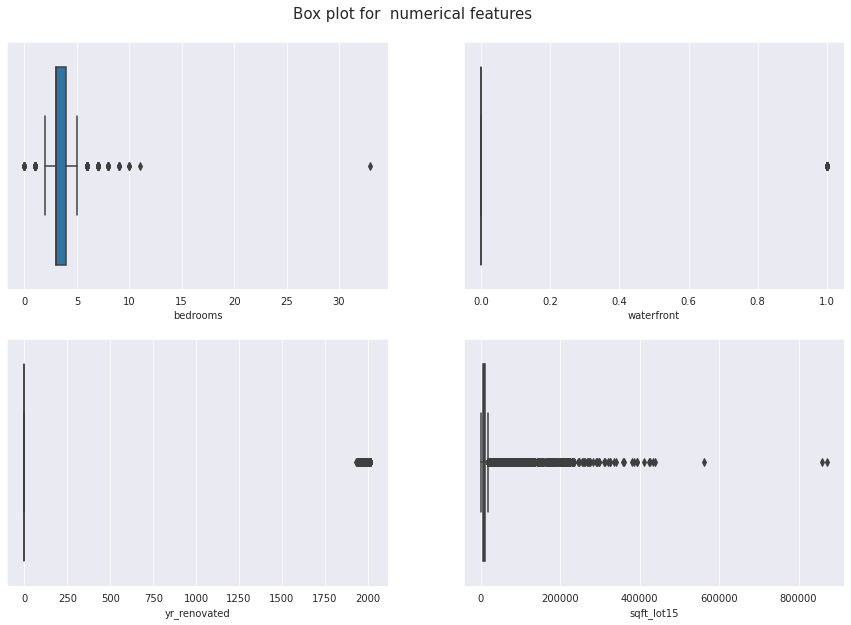

In [27]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for  numerical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, columns):
  sns.boxplot(df[name], ax = ax)

*Some variables contain outliers. We will not drop them as they will be useful when making predictions*

### 4) EDA

In [103]:
#finding skewness os each variable
for column in df.columns:
  print(f'Skewness of {column: <22} : {df[column].skew()}')

Skewness of id                     : 0.24332854761624428
Skewness of price                  : 4.021715573048684
Skewness of bedrooms               : 1.97429953543601
Skewness of bathrooms              : 0.5111075733474171
Skewness of sqft_living            : 1.471555426802092
Skewness of sqft_lot               : 13.060018959031755
Skewness of floors                 : 0.616176721157611
Skewness of waterfront             : 11.385107942339081
Skewness of view                   : 3.395749593248714
Skewness of condition              : 1.0328046374434587
Skewness of grade                  : 0.7711032007576067
Skewness of sqft_above             : 1.4466644733818372
Skewness of sqft_basement          : 1.5779650555996247
Skewness of yr_built               : -0.46980539881436767
Skewness of yr_renovated           : 4.549493366993928
Skewness of zipcode                : 0.4056612082396646
Skewness of lat                    : -0.4852704765380861
Skewness of long                   : 0.885052983432

*all vars have a positive skew apart from yrbuilt and latitude*

In [104]:
#finding the kurtosis
for column in df.columns:
  print(f'kurtosis for {column: <22} : {df[column].kurt()}')

kurtosis for id                     : -1.260541870514302
kurtosis for price                  : 34.522444410072566
kurtosis for bedrooms               : 49.06365318170099
kurtosis for bathrooms              : 1.2799024441754554
kurtosis for sqft_living            : 5.24309298981711
kurtosis for sqft_lot               : 285.0778196973658
kurtosis for floors                 : -0.4847229368298285
kurtosis for waterfront             : 127.63249356537696
kurtosis for view                   : 10.893021684601504
kurtosis for condition              : 0.5257635652845423
kurtosis for grade                  : 1.1909320773987657
kurtosis for sqft_above             : 3.40230362139787
kurtosis for sqft_basement          : 2.7155742114129353
kurtosis for yr_built               : -0.657407504733527
kurtosis for yr_renovated           : 18.701152117599058
kurtosis for zipcode                : -0.8534788732101246
kurtosis for lat                    : -0.6763130016065335
kurtosis for long                 

In [30]:
print(df['yr_built'].min())
print(df['yr_built'].max())

1900
2015


In [31]:
print(df['yr_renovated'].min())
print(df['yr_renovated'].max())

0
2015


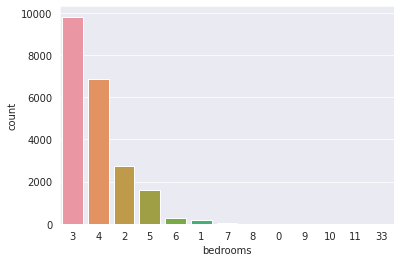

In [ ]:
#bedrooms
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

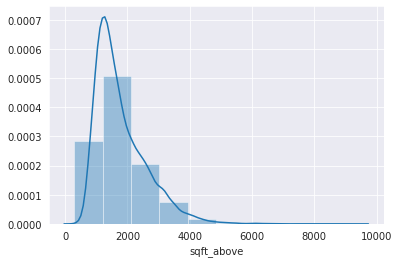

In [32]:
#sqftabove
sns.distplot(df['sqft_above'], bins=10)  

*plot is skewed to the right*

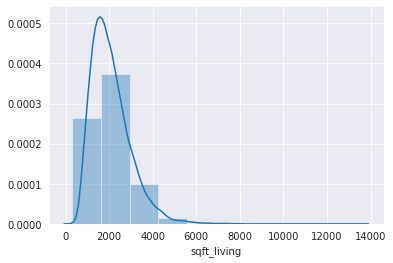

In [33]:
#sqft living
sns.distplot(df['sqft_living'], bins=10) 

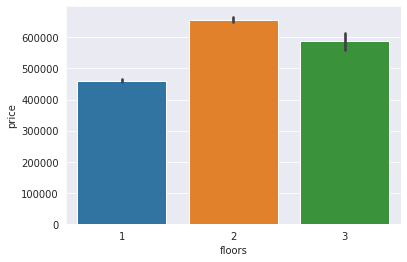

In [34]:
#floors
df["floors"] = df["floors"].astype(int)
sns.barplot(x= 'floors', y = 'price', data = df)

*italicized texhome with 2 and 3 floors have higher prices compared to 1 floor*

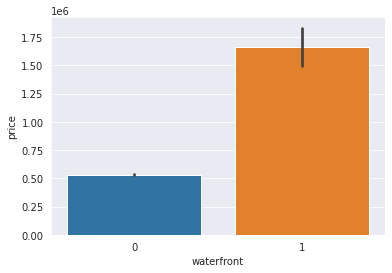

In [35]:
#waterfront
sns.barplot(x= 'waterfront', y = 'price', data = df)

*home with 1 watrfront is more expensive*

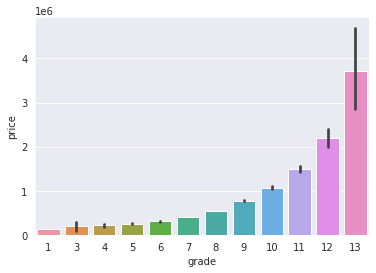

In [36]:
#waterfront
sns.barplot(x= 'grade', y = 'price', data = df)

*the higher the grade, the higher the price*

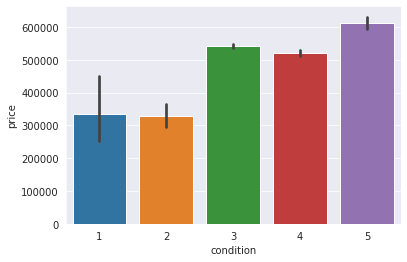

In [37]:
#waterfront
sns.barplot(x= 'condition', y = 'price', data = df)

*houses with better conditions have high prices*

*Identifying factors that may highly affect price.
by using different visualization. Id will not be important in this case.*

In [38]:
CorrMatrix=df.corr()
CorrMatrix  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.019120,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.237207,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.519019,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.019120,0.237207,0.155643,0.519019,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


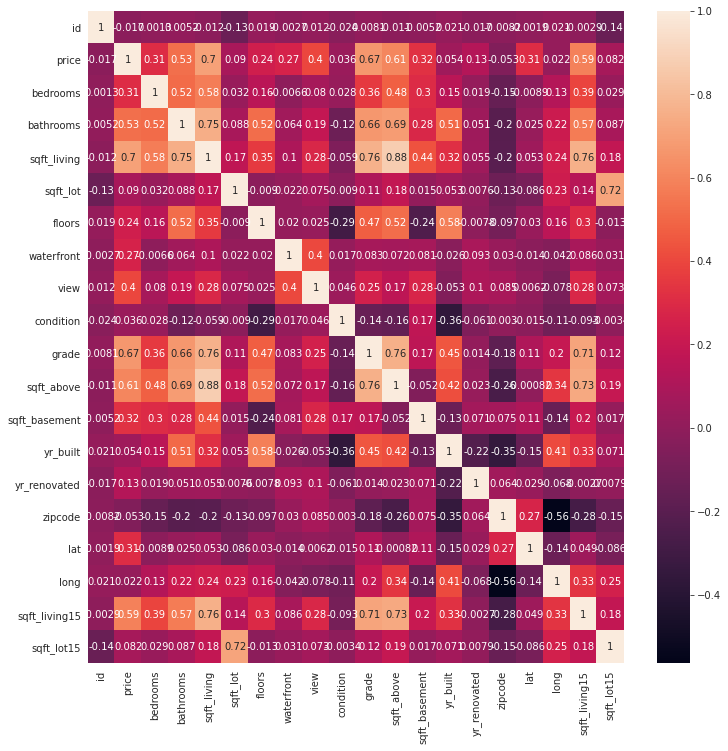

In [39]:
#heatmap to view the correlation 
#
plt.figure(figsize=(12, 12))  

# Identifying factors that are highly correlated to house price
# 
sns.heatmap(CorrMatrix, annot = True) 

*in the price row, the factors that are highly correlated to price are: sqft_living15, sqft_living, sqft_above , grade, bathrooms have a high correlation to house price*

### 5) Modelling

**Linear Regression**

In [105]:
#multiple linear regression
#y=price, x-independents vars
#drop id cz its of less importance
X = df.drop(['price', 'id'], axis=1)
y = df['price']

#dividing data into train and test sets
#the test size is 20%, train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#training the algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#intercept
print('intercept', regressor.intercept_)
print('***************************************************')
#coefficient
print('coefficients', regressor.coef_)

#making predictions
y_pred = regressor.predict(X_test)

#Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('***************************************************')

#Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('***************************************************')
#RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

intercept 4151444.922037294
***************************************************
coefficients [-3.47007233e+04  3.94537780e+04  1.12667741e+02  1.75770479e-01
  7.42274767e+03  6.05764114e+05  5.28006756e+04  2.61936914e+04
  9.36843361e+04  7.28330231e+01  3.98347181e+01 -2.60926415e+03
  2.01216818e+01 -5.67605311e+02  6.04949838e+05 -2.22616017e+05
  2.42427006e+01 -4.67518411e-01]
Mean Absolute Error: 122292.14383824011
***************************************************
Mean Squared Error: 36326416754.03765
***************************************************
Root Mean Squared Error: 190594.90222468608


*the output displays the intercept and the coefficients of all the independent variables. The RMSE is 190524.90 which is 10% higher than our target mean. The model is not good.*

In [106]:
#accuracy of our model using r2score
r2_score(y_test,y_pred)

0.6949536715546484

*our model is 69% accurate*

**Muliticollinearity**

In [107]:
#plot correlation matrix of all independent variables

corr=df.drop('price', axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
bedrooms,0.001286,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.008130,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


*across the diagonal, 1 suggest that the features are correlated to themselves*

In [43]:
#using VIF
#Compute VIF data for each independent variable

df = df.drop(['price'],axis=1)
vif = pd.DataFrame()
vif["features"] = df.columns
vif["vif_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,vif_Factor
0,id,3.631502
1,bedrooms,1.651959
2,bathrooms,3.343348
3,sqft_living,inf
4,sqft_lot,2.104284
5,floors,2.148025
6,waterfront,1.203725
7,view,1.420300
8,condition,1.220285
9,grade,3.390136


*most features are not highly correlated because their values are less than 5*

**residuals and heteroscedasticity**

In [44]:
#creating residuals
residuals = np.subtract(y_pred, y_test)

#describing our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

4675.531355348749

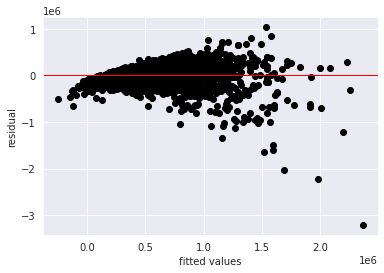

In [45]:
#residual scatter plot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

*we can observe that the residuls are not constant.This is because of the outliers exist and we can also observe datapoints that are far away from the mean.this also indicates none linearity in the data*

In [46]:
#heteroskedasticity test.

In [47]:
#bartletts test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#computing a critical value of the chi squared distribution
degree_of_freedom = len(y_pred) - 1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Quantile Regression**

*this type of regression is used when there exists multicollinearity, outliers and heteroscedasticity.In our data we have outliers $ residuals and this type of regression will be appropriate*

In [108]:
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [118]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
x = df[['sqft_above', 'grade', 'lat', 'sqft_living', 'sqft_living15']]
y = df['price']
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)
print(res.summary())

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4058
Model:                       QuantReg   Bandwidth:                   2.158e+04
Method:                 Least Squares   Sparsity:                    2.847e+05
Date:                Fri, 31 Jul 2020   No. Observations:                21613
Time:                        13:29:11   Df Residuals:                    21607
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.967e+07   3.37e+05    -88.027      0.000   -3.03e+07    -2.9e+07
x[0]         -36.2098      2.580    -14.033      0.000     -41.268     -31.152
x[1]        6.722e+04   1396.280     48.140      0.000    6.45e+04       7e+04
x[2]        6.175e+05   7110.315     86.849      0.0

In [121]:
# building each quantile inside a for loop
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x[1]']] + res.conf_int().loc['x[1]'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt     intercept        x_coef  cf_lower_bound  cf_upper_bound
0   0.1 -1.813480e+07  51246.719422    48982.949953    53510.488890
1   0.2 -1.994448e+07  53448.323141    51171.790200    55724.856082
2   0.3 -2.463309e+07  61586.770177    59065.083991    64108.456364
3   0.4 -2.695037e+07  65406.248268    62882.460569    67930.035967
4   0.5 -2.967078e+07  67216.840783    64480.029092    69953.652475
5   0.6 -3.186677e+07  69960.191670    66970.808783    72949.574558
6   0.7 -1.947944e+02  78003.706712    73628.449125    82378.964300
7   0.8 -3.648124e+07  68026.660826    62737.331360    73315.990292
8   0.9 -3.852842e+07  60783.534436    52819.089562    68747.979310
9   0.1 -1.813480e+07  51246.719422    48982.949953    53510.488890
10  0.2 -1.994448e+07  53448.323141    51171.790200    55724.856082
11  0.3 -2.463309e+07  61586.770177    59065.083991    64108.456364
12  0.4 -2.695037e+07  65406.248268    62882.460569    67930.035967
13  0.5 -2.967078e+07  67216.840783    64480.029

**Ridge regression**

*It is an extension of linear regression where the loss function is modified to reduce the complexity of the model.*

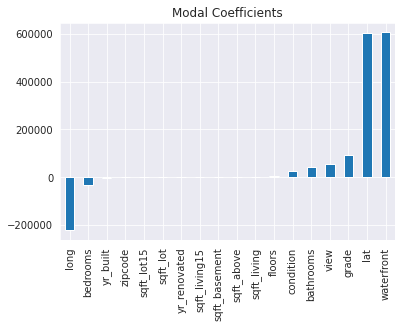

In [49]:
#graph showing the coefficients

predictors = X_train.columns

coef = Series(regressor.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

*the coefficients of waterfront and lat is much higher than the others.therefore the price will be mainly driven by these two factors*

In [50]:
#creating the baseline reg model
#fitting our model

regression = LinearRegression()
regression.fit(X,y)

#mean square error
first_model = (mean_squared_error(y_true=y, y_pred=regression.predict(X)))
print(first_model)

40521925248.37479


In [51]:
#determining the value of L2 regularization by using gridsearch
#creating ridge regression
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [52]:
#fit the function
#alpha is set at 0.01
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41025645093.55712

In [53]:
#accuracy of the ridge reg
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

#r3score prediction
sklearn.metrics.r2_score(y, ridge.predict(X))

40528225373.37049


0.6996769452970686

*r2score is 70%. If we compare the r2 of linear regression and ridge regression we will notice a slight increase in r2 score. Linear regression is 0.6950 and that of ridge is 0.6997. This means the is an improvement in our model perfomance*

In [54]:
#viewing the feature coefficients 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 110.34033115782977,
 'bedrooms': 41761.92895395055,
 'condition': 96131.07651056166,
 'floors': 583115.1684329183,
 'grade': 71.50143071364884,
 'id': -35761.16877045663,
 'lat': -215641.67871629182,
 'long': 21.319020978450755,
 'sqft_above': 38.83890048937355,
 'sqft_basement': -2622.492701422556,
 'sqft_living': 0.12777609429352127,
 'sqft_living15': -0.3835605597450922,
 'sqft_lot': 4341.300830667105,
 'view': 26321.495859796923,
 'waterfront': 52963.510092047814,
 'yr_built': 19.855517974042932,
 'yr_renovated': -580.0691051130508,
 'zipcode': 603439.5858877426}

**Lasso regression**

*perfoms L1 regularization. Used mainly to avoid problems with overfitting and when we have large independent variables. L1 regularization causes some features to be shrunk upto zero and this enables feature selection.*

In [66]:
#creating the features
#scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [67]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print('*********************************')
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print('*********************************')
print("lasso coef:", lasso.coef_) 

lasso score: 0.6997236302955291
*********************************
lasso MSE: 40521925290.47799
*********************************
lasso coef: [-33258.16786059  32156.2166554  259309.7298258    5289.19347444
   2395.52507805  50447.56905988  40586.00349146  17127.03290299
 112998.1222877  -83215.95163285 -58929.37154456 -77027.82030617
   7974.63663187 -31033.36352058  83611.49926872 -30365.25338972
  14605.49900508 -10469.78085007]


In [68]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch.
# Making necessary imports, split data into training and test sets, and choose a set of parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print('*********************************')
print("lasso score:", gridlasso.score(X_test, y_test))
print('*********************************')
print("linear score:", linear.score(X_test, y_test)) 
print('*********************************')
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print('*********************************')
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print('*********************************')
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print('*********************************')
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 19.0}
*********************************
lasso score: 0.7097487180208374
*********************************
linear score: 0.7097485644235983
*********************************
lasso MSE: 41206066793.93424
*********************************
linear MSE: 41206088599.653915
*********************************
lasso best estimator coef: [-34280.92192179  28236.16525634 216203.7746877    5818.5000823
   5246.1453582   47899.11386118  39690.72267232  18877.08105006
 113300.12516237 -44674.35166611 -38764.04103605 -77412.10102409
   7000.138388   -31256.35964779  83557.68138944 -30610.29153525
  16376.65211477  -9742.73108924]
*********************************
linear coef: [-34304.71135243  28359.8074975   81584.89361599   5877.6762542
   5252.06753748  47912.50071739  39689.17778428  18897.37543314
 113249.88777448  76578.36989162  26022.80873753 -77448.70209861
   7013.19791642 -31304.36188067  83584.65570857 -30657.27349502
  16489.60764319  -9793.60462322]


*the lasso score is 0.71. compared to ridge regression, the scores have remained constant.the MSE has of lasso has reduced. Our model is performing well*

In [69]:
#price prediction
gridlasso= gridlasso.predict(X_test)
gridlasso

array([538437.92160948, 632432.38094789, 502775.30200068, ...,
       744767.5194928 , 184219.19602582, 859545.79788466])

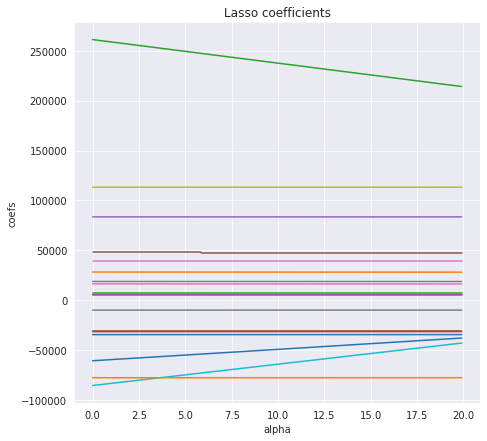

In [70]:
#plotting lasso graph
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**ElasticNet regression**

*It combines both the properties of ridge and lasso regression. It works by penalizing the model using the L2 and L1 regularization.*

In [132]:
#Elastic Net

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

200819.0841840153
0.6958848916261406
203015.8292709338
0.7096827861562128


*elastic net accuracy is 71%.It is performing better than the linear regression*

In [133]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 538.5929206239813,
 'bedrooms': 4402.330315301802,
 'condition': 3779.768916761168,
 'floors': 2539.960600714121,
 'grade': 2063.5607386912766,
 'id': 1873.52766494575,
 'lat': 3656.864964133857,
 'long': 485.12103196803383,
 'price': 3250.3700015700374,
 'sqft_above': 216.57081579511933,
 'sqft_basement': 823.2200423457463,
 'sqft_living': 1565.0143518966152,
 'sqft_lot': 1725.5559233487022,
 'view': 4201.412944288653,
 'waterfront': 283.5347733221719,
 'yr_built': -283.470478627965,
 'yr_renovated': 2029.4070974313713,
 'zipcode': 50.53669971540561}

In [ ]:
pd.DataFrame({'feature': X.columns, 
              'lasso_coeff': lasso.coef_, 
              'ridge_coeff': ridge.coef_[0], 
              'elastic_coeff': elastic.coef_}).sort_values(by = 'elastic_coeff', ascending = False).head(20)

**Challenging the solution**

*using random forest to compare the results*

**Random forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor(n_estimators=100)
#Fit the model
model.fit(X_train, y_train)
print("Accuracy is ", model.score(X_test, y_test)*100)

Accuracy is  86.95590984995101


*The random forest has an accuracy of 86.9%. The accuracy is high compared to that of linear,ridge,lasso and elasticnet. Thies means that random forest performs better.*